# Titanic

https://www.kaggle.com/c/titanic/overview 

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use [feature engineering ](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Variable Definitions 

| **Variable** | **Definition**                             | **Key**                                        |
| :----------- | :----------------------------------------- | :--------------------------------------------- |
| survival     | Survival                                   | 0 = No, 1 = Yes                                |
| pclass       | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex          | Sex                                        |                                                |
| Age          | Age in years                               |                                                |
| sibsp        | # of siblings / spouses aboard the Titanic |                                                |
| parch        | # of parents / children aboard the Titanic |                                                |
| ticket       | Ticket number                              |                                                |
| fare         | Passenger fare                             |                                                |
| cabin        | Cabin number                               |                                                |
| embarked     | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Exploratory Data Analysis 

In [353]:
# Load libraries 
import numpy as np # For large multidimensional arrays (operates similar to MATLAB matricies)
import pandas as pd # For dataframes 
import matplotlib.pyplot as plt # For plotting 
import seaborn as sns; sns.set() # Python's equivalent to R's ggplot 
import random

# Read Titanic data
dataPath = "./data"
titanicData = pd.read_csv(dataPath + "/train.csv")
test = pd.read_csv(dataPath + "/test.csv")

In [354]:
print(titanicData.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [355]:
# Quick summmary statistics of data (look for outliers/weird stuff)
print("Summary Statistics of Numerical Variables\n", 
      titanicData.select_dtypes(include = "number").describe(),
     "\n")

print("Summary Statistics of Categorical Variables\n",
      titanicData.select_dtypes(include = "object").describe(),
     "\n")

print("Summary Statistics of Missing Values (Training)\n", 
      titanicData.isnull().sum(axis=0),
     "\n")

print("Summary Statistics of Missing Values (Test)\n", 
      test.isnull().sum(axis=0))

Summary Statistics of Numerical Variables
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   

Summary Statistics of Categorical Va

A quick look over the metrics, we see that the Fare distribution might be right skewed since mean and median doesn't match. Also there might be some outliers as the max value of Fare is order of magnitude higher than the other metrics. 

It seems like SibSp and Parch has lots of zero values so also likely very right skewed. 

There is also lots of missing values for Cabin and some missing values for Age. Since we have limited training data, we should try not to filter/throw away data. The predictive power of our model is only as good as the training data. 

Now lets explore the variables!

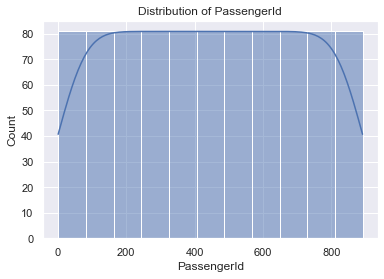

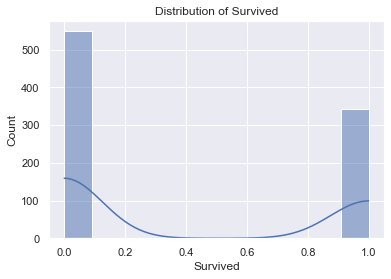

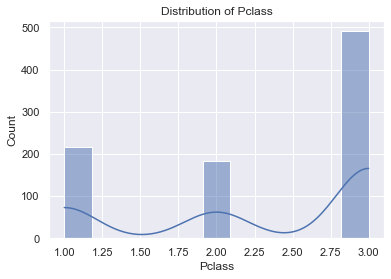

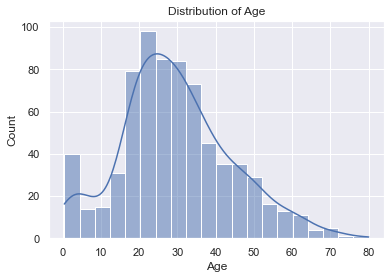

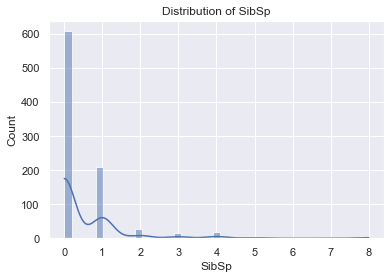

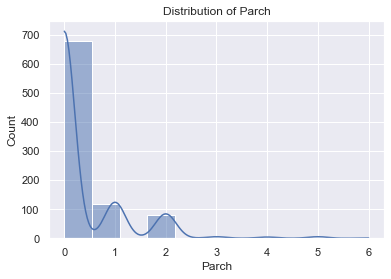

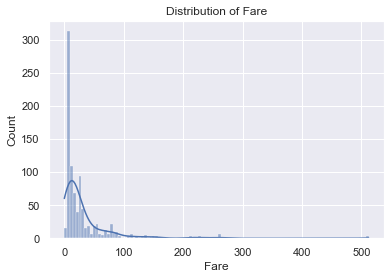

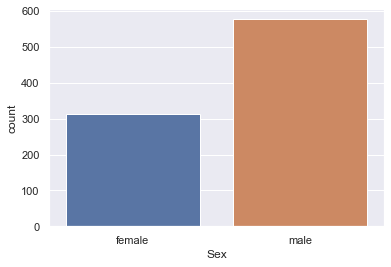

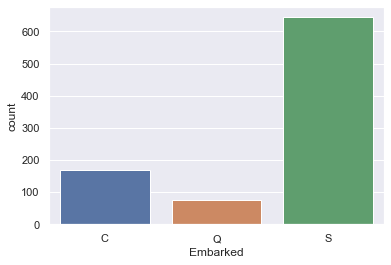

In [356]:
# This looks at this distribution of all numerical data 
for i, v in enumerate(titanicData.select_dtypes(include = "number")):
    sns.histplot(titanicData[v], kde = True)
    plt.title("Distribution of " + v)
    plt.show()

# This looks at this distribution of all categorical data
for i, v in enumerate(["Sex", "Embarked"]):
    sns.countplot(x = titanicData[v].astype('category')) # Pandas automatically loads categorical data as "objects" so we need to convert 
    plt.show()

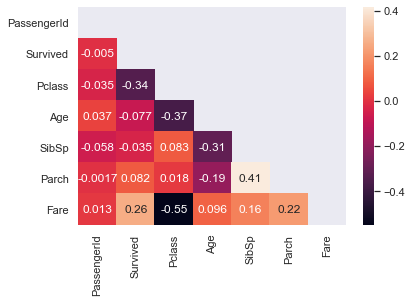

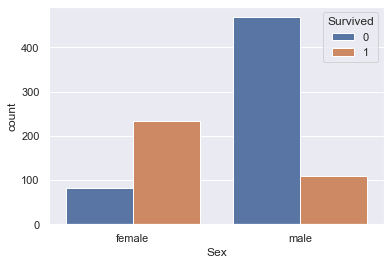

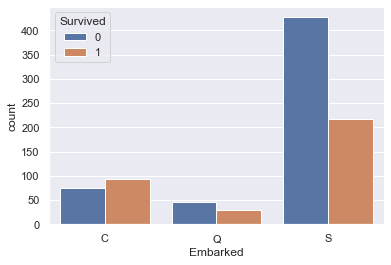

In [357]:
# Heatmap to visalise some correlation between variables 
sns.heatmap(titanicData.corr(), annot = True, mask = np.triu(titanicData.corr()))
plt.show()

# For categorical variables, we can explore just using regular plots
for i, v in enumerate(["Sex", "Embarked"]):
    sns.countplot(x = titanicData[v].astype('category'), hue = titanicData["Survived"])
    plt.show()

The fare and socio-economic status of an individual seems to have high correlation with the survivability of an individual. Parch, SibSp, and age seems to have very low correlation. We can probably do some **feature engineering** on these variables to improve explainability. 

For the categorical variables, females seem to have a higher chance of survival compared to males. The survival rates also vary based on port of embarkation. 

Ticket, cabin, and name has way too many categories so we need to also do some **feature engineering** in order to improve explainability.

# Data Cleaning & Feature Engineering 

From our exploratory analysis, we found that there was quite a bit of missing data for cabin and age that we should deal with, so we should do that first before feature engineering more variables.

There are many ways to clean missing data 
1. Simply filter out the missing values (can be very degrees of freedom expensive)
2. Imputation 

Mentioned earlier, we want a good predictive model, so it is better to retain as much of the data as possible, so we will go with imputation. Imputation in itself is a big topic as well since there are many techniques to impute data.

Imputation - The process of replacing missing data by substituting values from some distribution.
- Mean imputation where we replace missing values with the average value of the known values 
- Regression imputation where we replace missing values from a regression model (only useful if we know that two variables are extremely correlated). We can make regression imputation even more complicated by adding some random variations to it (e.g. residuals), and this is called stochastic regression imputation.
- Hot deck imputation where we randomly sample the known values (with replacement) to deal with the missing values. This is kind of like bootstrapping.
- Cold deck imputation where we use an external source to obtain these values i.e. from another sample. 
- A composite method that combines any of the above methods 
- ... theres many more ... 

We can do some sort of hot deck imputation to get fill in the missing ages. Notice that there is a strong correlation between age and socio-economic class, so we will impute the age based on the class of the individual. 

For the missing cabin values, we could also do hot deck imputation but since there are so many missing values, this might be hard. We could probably still do hot deck imputation but have to leverage some of the other variables to help us. The cabin is likely related to the socio-economic class (Pclass variable), and that variable has no missing values. So for the missing cabin values we can impute a value that depends on socio-economic class of that individual. I will leave this as an exercise for you guys to try. I will just take an easy way out and just convert the cabin variable into a simplier variable with fewer categories. 

Lastly, there are 2 observations from the embarked variable that is missing, and we can probably use hot deck imputation as well. From our exploratory analysis we can see that the socio-economic class has a strong correlation with survival, and that the survival rates different depending on the place of embarkation, we should check if there is any relationship between class and embark first. If there is some relationship, we impute the embark based on class like what we did in age. 

In [358]:
# Clean Age

# Since age depends on class, we impute the missing age for people in each class 
# Some basic hot deck imputation to get the age 
# First we drop all the "na" values from the age variable 
# Second we sample with replacement from that list of values the number of missing values 
# Replace the missing values with those sampled values 
titanicData["AgeImputed"] = titanicData["Age"]
for c in titanicData["Pclass"].unique():
    temp = titanicData[titanicData["Pclass"] == c]
    ageDropped = temp["Age"].dropna().tolist()
    numMissingValues = temp["Age"].isna().sum()
    if numMissingValues == 0:
        continue 
    imputedAges = random.choices(ageDropped, k = numMissingValues)
    indexMissingValues = temp[temp["Age"].isna()].index
    titanicData["AgeImputed"] = titanicData["AgeImputed"].fillna(pd.Series(data = imputedAges, index = indexMissingValues))
print(titanicData[["Age", "AgeImputed"]])

      Age  AgeImputed
0    22.0        22.0
1    38.0        38.0
2    26.0        26.0
3    35.0        35.0
4    35.0        35.0
..    ...         ...
886  27.0        27.0
887  19.0        19.0
888   NaN        28.0
889  26.0        26.0
890  32.0        32.0

[891 rows x 2 columns]


In [359]:
# Clean cabin 

# ALthough we can do something similar with the cabin variable to replace missing values
# I decided to choose an easier way to clean this variable through feature engineering
# We notice that each cabin starts with a letter that indicates the level of the cabin 
# Each individual cabin is probably not that useful, so we can create a new cateogry 
# That just describes the persons floor, and those without a cabin will have a default label 
print(titanicData["Cabin"].unique()) # We see each cabin is just a floor + a room number 
# Make the assumption that missing values just corresponds to a generic floor/ground floor 
# Clean by getting the first letter (the floor) then fill all other missing values with a default cabin 
titanicData["Floor"] = titanicData["Cabin"].str.get(0).fillna("Ground Floor").astype('category')
print(titanicData[["Cabin", "Floor"]])
# Note that you can probably do more complex feature engineering for the cabin variable 

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
    Cabin         Floor
0     NaN  Ground F

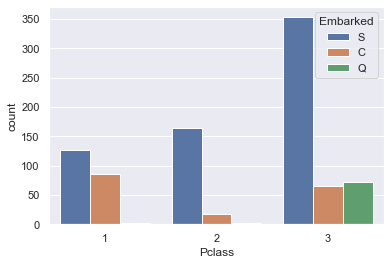

In [360]:
# Explore relationship between embarked and pclass
sns.countplot(x = titanicData["Pclass"].astype('category'), hue = titanicData["Embarked"])
plt.show()

We see that all classes embark at port S and C but only the low socio-economic class emarks at port Q. So depending on the missing values' class, we will have to impute differently. 

In [361]:
# Clean embarked

titanicData["EmbarkedImputed"] = titanicData["Embarked"]
for c in titanicData["Pclass"].unique():
    temp = titanicData[titanicData["Pclass"] == c]
    embarkedDropped = temp["Embarked"].dropna().tolist()
    numMissingValues = temp["Embarked"].isna().sum()
    if numMissingValues == 0:
        continue 
    imputedAges = random.choices(embarkedDropped, k = numMissingValues)
    indexMissingValues = temp[temp["Embarked"].isna()].index
    titanicData["EmbarkedImputed"] = titanicData["EmbarkedImputed"].fillna(pd.Series(data = imputedAges, index = indexMissingValues))
print(titanicData[["Embarked", "EmbarkedImputed"]])

    Embarked EmbarkedImputed
0          S               S
1          C               C
2          S               S
3          S               S
4          S               S
..       ...             ...
886        S               S
887        S               S
888        S               S
889        C               C
890        Q               Q

[891 rows x 2 columns]


Now that we have cleaned up most of the missing variables, we can do some more feature engineering, especially for those variables that had low correlation with survival. 

We already saw an example of feature engineering of the cabin variable by selecting only the floor letter. Similar things such as creating groups can also be done to create features. 

For example, the age category has a somewhat low correlation which we might not expect. We are likely to expect young children and the elderly to have a much lower chance of survival than those who are teens or adults. So this is the next variable we can look at creating a new feature for. Perhaps, an age group? 

In [362]:
# More Feature Engineering 
titanicData["AgeGroup"] = pd.cut(x = titanicData["AgeImputed"], 
                                 bins = [-1, 10, 20, 65, 100], 
                                 labels = ["Child", "Teen", "Adult", "Elderly"])
print(titanicData["AgeGroup"])

0      Adult
1      Adult
2      Adult
3      Adult
4      Adult
       ...  
886    Adult
887     Teen
888    Adult
889    Adult
890    Adult
Name: AgeGroup, Length: 891, dtype: category
Categories (4, object): ['Child' < 'Teen' < 'Adult' < 'Elderly']


Next, we see that the names variable contains the last names and a title. This can be helpful if we wanted to group family members together. 

In [363]:
# Clean name 

# Split the name variable into surname and title 
print(titanicData["Name"].head()) 
namesSplitted = titanicData["Name"].str.split()
titanicData["Surname"] = [name[0] for name in namesSplitted]

title = []
for name in namesSplitted:
    count = 0
    for word in name:
        if "." in word:
            count = count + 1
            title.append(word)
        if count == 1: 
            break
titanicData["Title"] = title
print(titanicData[["Surname", "Title"]])

# More cleaning needs to be done
# print(titanicData["Surname"].value_counts())
print(titanicData["Title"].value_counts())
titanicData["Title"] = titanicData["Title"].replace(["Mlle.", "Ms.", "Mme."], "Miss.")
allowedTitles = ["Mr.", "Miss.", "Mrs.", "Master."]
titanicData.loc[~titanicData["Title"].isin(allowedTitles), "Title"] = "Other Titles"
print(titanicData["Title"].value_counts())

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object
        Surname  Title
0       Braund,    Mr.
1      Cumings,   Mrs.
2    Heikkinen,  Miss.
3     Futrelle,   Mrs.
4        Allen,    Mr.
..          ...    ...
886   Montvila,   Rev.
887     Graham,  Miss.
888   Johnston,  Miss.
889       Behr,    Mr.
890     Dooley,    Mr.

[891 rows x 2 columns]
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Don.           1
Mme.           1
Countess.      1
Lady.          1
Capt.          1
Jonkheer.      1
Ms.            1
Sir.           1
Name: Title, dtype: int64
Mr.             517
Miss.           186
Mrs.            125
Master.          40
Othe

Finally, we can take a look at SibSp and Parch. These two variables essentially describes the family size. Perhaps, a larger family size might have a higher chance of survival? Or not?

In [364]:
# Family size 

titanicData["FamilySize"] = pd.cut(x = titanicData["SibSp"] + titanicData["Parch"], 
                                 bins = [-1, 1, 3, 6, 10], 
                                 labels = ["Alone", "Small", "Medium", "Large"],
                                 right = True)
print(titanicData[["FamilySize", "SibSp", "Parch"]])

    FamilySize  SibSp  Parch
0        Alone      1      0
1        Alone      1      0
2        Alone      0      0
3        Alone      1      0
4        Alone      0      0
..         ...    ...    ...
886      Alone      0      0
887      Alone      0      0
888      Small      1      2
889      Alone      0      0
890      Alone      0      0

[891 rows x 3 columns]


In [365]:
# Fare distribution is a bit skewed

titanicData["FareBuckets"] = pd.cut(x = titanicData["Fare"], 
                                 bins = [-1, 8, 31, 100, 1000], 
                                 labels = ["LQ", "IQ", "UQ", "Special"],
                                 right = True)

Now that we have cleaned the training data set, we must do the exact same thing to our test data set to ensure consistency

In [366]:
test["AgeImputed"] = test["Age"]
for c in titanicData["Pclass"].unique():
    temp = test[test["Pclass"] == c]
    ageDropped = temp["Age"].dropna().tolist()
    numMissingValues = temp["Age"].isna().sum()
    if numMissingValues == 0:
        continue 
    imputedAges = random.choices(ageDropped, k = numMissingValues)
    indexMissingValues = temp[temp["Age"].isna()].index
    test["AgeImputed"] = test["AgeImputed"].fillna(pd.Series(data = imputedAges, index = indexMissingValues))
test["Floor"] = test["Cabin"].str.get(0).fillna("Ground Floor").astype('category')
test["EmbarkedImputed"] = test["Embarked"] # The test data set didnt have any missing values for this variable 
# This is just for consistency. Alternatively, we didn't have to make any new columns and just replaced the existing ones

# There was a missing fare value in the test data, which I will just simply replace with zero 
# It would be better to drop this for consistency since we didn't do any imputations/cleaning in training relating to the fare variable, 
# but since it is just one data point I will just simply replace with zero and shouldn't affect results too much ...
test["Fare"] = test["Fare"].fillna(0)
test["AgeGroup"] = pd.cut(x = test["AgeImputed"], 
                          bins = [-1, 10, 20, 65, 100], 
                          labels = ["Child", "Teen", "Adult", "Elderly"])
namesSplitted = test["Name"].str.split()
test["Surname"] = [name[0] for name in namesSplitted]
title = []
for name in namesSplitted:
    count = 0
    for word in name:
        if "." in word:
            count = count + 1
            title.append(word)
        if count == 1: 
            break
test["Title"] = title
test["Title"] = test["Title"].replace(["Mlle.", "Ms.", "Mme."], "Miss.")
allowedTitles = ["Mr.", "Miss.", "Mrs.", "Master."]
test.loc[~test["Title"].isin(allowedTitles), "Title"] = "Other Titles"
test["FamilySize"] = pd.cut(x = test["SibSp"] + test["Parch"], 
                            bins = [-1, 1, 3, 6, 10], 
                            labels = ["Alone", "Small", "Medium", "Large"],
                            right = True)
test["FareBuckets"] = pd.cut(x = test["Fare"], 
                                 bins = [-1, 8, 31, 100, 1000], 
                                 labels = ["LQ", "IQ", "UQ", "Special"],
                                 right = True)

In [ ]:
# Talk about one hot encoding 


In [367]:
# Save cleaned data for future reference 
titanicData.to_csv(dataPath + "/train_cleaned.csv")
test.to_csv(dataPath + "/test_cleaned.csv")

# References 

https://www.kaggle.com/c/titanic/overview  
https://pandas.pydata.org/docs/reference/index.html  
https://matplotlib.org/  
https://seaborn.pydata.org/api.html  

